
# Credit Worthiness Prediction Model
## Data Cleansing and Preparation


### Team Members:

<pre> Pablo Macaraeg</pre>
<pre> Jennifer Macaraeg</pre>
<pre> John Derek Requejo</pre>


### Loading Libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot

init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Plotting imports and settings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (13,8)

# ML imports
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold


from pathlib import Path
from tqdm import tqdm

### Loading the Dataset

In [2]:
df_train = pd.read_csv("credit_train.csv") 
df_test = pd.read_csv("credit_test.csv")   

#source: https://www.kaggle.com/zaurbegiev/my-dataset

## Exploring/Cleaning credit_train Data Set

This dataset will be used for training the model.

In [3]:
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
df_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [5]:
df_train.shape

(100514, 19)

In [6]:
df_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

Replace spaces in all column names with space with underscore.

In [7]:
df_train.columns = [c.replace(' ', '_') for c in df_train.columns]

In [8]:
df_train.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [9]:
#Replacing Loan_Status description to binary integer classification (0 for Charged Off and 1 for Fully Paid) to easily calculate values.

df_train["Loan_Status"].replace(['Fully Paid', 'Charged Off'], [1, 0], inplace=True)

#df_train['Loan_Status'].values

df_train.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1.0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1.0,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1.0,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1.0,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1.0,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [10]:
df_train.isnull().sum()

Loan_ID                           514
Customer_ID                       514
Loan_Status                       514
Current_Loan_Amount               514
Term                              514
Credit_Score                    19668
Annual_Income                   19668
Years_in_current_job             4736
Home_Ownership                    514
Purpose                           514
Monthly_Debt                      514
Years_of_Credit_History           514
Months_since_last_delinquent    53655
Number_of_Open_Accounts           514
Number_of_Credit_Problems         514
Current_Credit_Balance            514
Maximum_Open_Credit               516
Bankruptcies                      718
Tax_Liens                         524
dtype: int64

#### Check rows where Loan_ID is null

In [11]:
null_Loan_ID = df_train[df_train['Loan_ID'].isna()]

In [12]:
null_Loan_ID.head(5)

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
null_Loan_ID.tail(5)

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As shown above, where Loan_ID is null, the values of the rest of the columns are all nulls as well. We will just drop these rows as these will not be relevant in training the model.

### Cleaning Data Set.

Drop the rows with null values such Loan_ID, Customer_ID etc

In [14]:
dfLoan = df_train[df_train['Loan_ID'].notnull()]

In [15]:
#check if there are rows where Loan_ID is null
dfLoan.Loan_ID.isnull().sum()

0

In [16]:
dfLoan.describe()

,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,100000.000000,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,0.773610,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,0.418496,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,0.000000,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,1.000000,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,1.000000,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [17]:
dfLoan.isnull().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    19154
Annual_Income                   19154
Years_in_current_job             4222
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    53141
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      204
Tax_Liens                          10
dtype: int64

In [18]:
dfLoan.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [19]:
# Dropping the column "Months since last delinquent" since null values is as at 53% and 
# dropping columns that are not needed or relevant.

dfLoan = dfLoan.drop(['Months_since_last_delinquent','Loan_ID', 'Customer_ID'], axis=1)


In [20]:
dfLoan.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [21]:
dfLoan["Years_in_current_job"].unique()

# Below values should be converted to the number of years in integer format alone without the 'years' word.

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [22]:
dfLoan['Years_in_current_job'] = dfLoan['Years_in_current_job'].map({'< 1 year':0.5,'2 years':2,'3 years':3,'4 years':4,'5 years':5,
'6 years':6, '7 years':7,'8 years':8,'9 years':9, '10+ years':15})


# Assigned less than 1 year to 0.5 and 10 plus years to 15 years to simplify assumption.

In [23]:
dfLoan.Years_in_current_job.unique()

array([ 8. , 15. ,  3. ,  5. ,  0.5,  2. ,  4. ,  9. ,  7. ,  nan,  6. ])

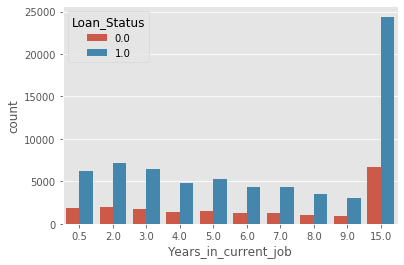

In [24]:
sns.countplot(x="Years_in_current_job", hue="Loan_Status", data=dfLoan)

In [25]:
dfLoan["Home_Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

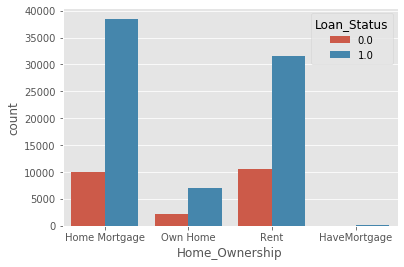

In [26]:
sns.countplot(x="Home_Ownership", hue="Loan_Status", data=dfLoan)
#Home mortgage has the most number of Fully Paid loan status.

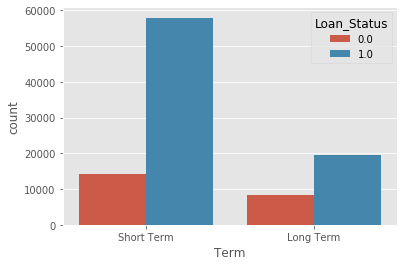

In [27]:
sns.countplot(x="Term", hue="Loan_Status", data=dfLoan)
#Short Term has the most number of loan duration.

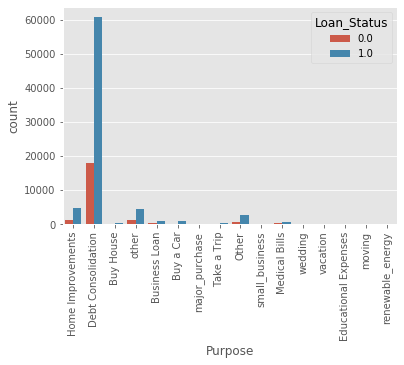

In [28]:
sns.countplot(data=dfLoan, x='Purpose', hue="Loan_Status")
plt.xticks(rotation=90)
plt.show()

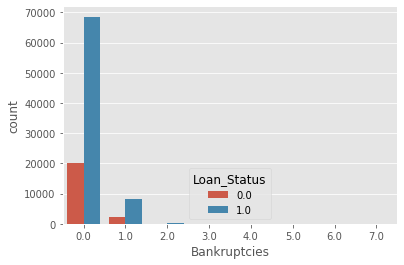

In [29]:
sns.countplot(x="Bankruptcies", hue="Loan_Status", data=dfLoan)

In [30]:
dfLoan["Tax_Liens"].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

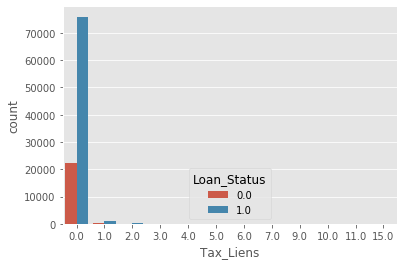

In [31]:
sns.countplot(x="Tax_Liens", hue="Loan_Status", data=dfLoan)

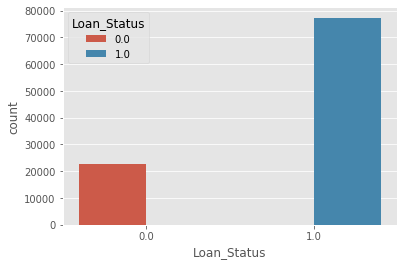

In [32]:
sns.countplot(x="Loan_Status", hue="Loan_Status", data=dfLoan)

In [33]:
dfLoan["Annual_Income"].min()

76627.0

In [34]:
dfLoan["Annual_Income"].max()

165557393.0

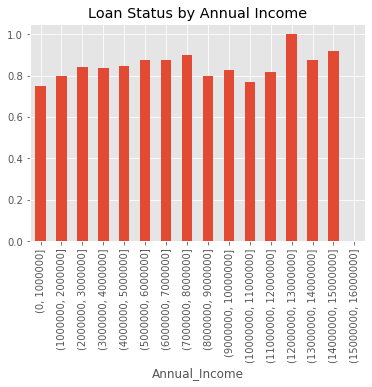

In [35]:
Annual_Income =  pd.cut(dfLoan["Annual_Income"], np.arange(0,17000000,1000000))

AI_Grouping = dfLoan.groupby(Annual_Income).mean()
plt.title("Loan Status by Annual Income")
AI_Grouping["Loan_Status"].plot.bar()

### Cleaning credit score
<pre>For a score with a range between 300-850, a credit score of 700 or above is generally considered good. 
A score of 800 or above on the same range is considered to be excellent. Most credit scores fall between 600 and 750.</pre>


source: https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/


Note that credit score attribute based from the data has values above 850 and seems that zero were added at the end, so we
 will need to remove the zeo for credit score above 850 by dividing credit score by 10
 dfLoan["Credit Score",">850"]
 

In [36]:
dfLoan['Credit_Score'] = dfLoan['Credit_Score'].apply(lambda val: (val /10) if val>850 else val)

In [37]:
dfLoan['Credit_Score'].unique()
#Now Credit Score above 850 is now normalized.

array([709.,  nan, 741., 721., 729., 730., 678., 739., 728., 740., 743.,
       727., 723., 747., 687., 750., 714., 724., 704., 688., 749., 746.,
       737., 733., 725., 745., 720., 718., 682., 712., 680., 710., 598.,
       719., 661., 652., 736., 738., 644., 672., 699., 751., 694., 675.,
       657., 748., 666., 734., 742., 705., 731., 624., 685., 717., 722.,
       618., 676., 692., 732., 649., 695., 744., 686., 637., 697., 706.,
       715., 707., 726., 716., 702., 651., 708., 698., 689., 735., 703.,
       693., 645., 691., 673., 700., 658., 674., 654., 681., 696., 713.,
       668., 659., 647., 683., 670., 623., 711., 639., 671., 614., 667.,
       701., 615., 656., 653., 664., 613., 636., 594., 646., 669., 612.,
       690., 641., 665., 677., 684., 655., 630., 663., 638., 596., 660.,
       679., 609., 603., 643., 633., 586., 629., 648., 640., 625., 635.,
       662., 627., 611., 604., 642., 621., 632., 602., 616., 600., 650.,
       597., 622., 610., 619., 628., 599., 606., 60

In [38]:
#Fill the null Credit Score with the mean credit score
dfLoan["Credit_Score"] = dfLoan["Credit_Score"].fillna(dfLoan["Credit_Score"].mean())

In [39]:
#check if there are rows where Loan_ID is null
dfLoan.Credit_Score.isnull().sum()

0

In [40]:
dfLoan['Credit_Score'] = dfLoan['Credit_Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
dfLoan['Credit_Score'] = dfLoan['Credit_Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
dfLoan['Credit_Score'] = dfLoan['Credit_Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
dfLoan['Credit_Score'] = dfLoan['Credit_Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
dfLoan['Credit_Score'] = dfLoan['Credit_Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

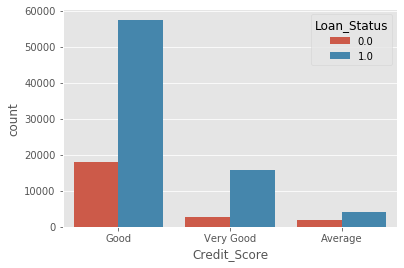

In [41]:
sns.countplot(x="Credit_Score", hue="Loan_Status", data=dfLoan)

In [42]:
dfLoan.isnull().sum()

Loan_Status                      0
Current_Loan_Amount              0
Term                             0
Credit_Score                     0
Annual_Income                19154
Years_in_current_job         10682
Home_Ownership                   0
Purpose                          0
Monthly_Debt                     0
Years_of_Credit_History          0
Number_of_Open_Accounts          0
Number_of_Credit_Problems        0
Current_Credit_Balance           0
Maximum_Open_Credit              2
Bankruptcies                   204
Tax_Liens                       10
dtype: int64

In [43]:
null_YrsCurJob = dfLoan[dfLoan['Years_in_current_job'].isna()]

In [44]:
null_YrsCurJob.head(5)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
26,1.0,99999999.0,Short Term,Good,1029857.0,NaN,Rent,Debt Consolidation,13817.18,12.0,6.0,0.0,138339.0,221232.0,0.0,0.0
29,1.0,107404.0,Short Term,Good,NaN,NaN,Home Mortgage,other,19238.07,43.7,5.0,0.0,28956.0,58014.0,0.0,0.0
45,1.0,266112.0,Short Term,Very Good,919296.0,NaN,Rent,Debt Consolidation,12946.79,21.6,9.0,0.0,266266.0,485518.0,0.0,0.0
73,1.0,311058.0,Long Term,Good,1343167.0,NaN,Home Mortgage,Debt Consolidation,21378.80,31.4,11.0,0.0,247912.0,541596.0,0.0,0.0
76,1.0,389884.0,Short Term,Average,4776125.0,NaN,Home Mortgage,Debt Consolidation,42985.22,21.5,14.0,1.0,237500.0,562386.0,1.0,0.0


In [45]:
null_AnnualIncm = dfLoan[dfLoan['Annual_Income'].isna()]

In [46]:
null_AnnualIncm.head(5)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1,1.0,262328.0,Short Term,Good,NaN,15.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
4,1.0,176220.0,Short Term,Good,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
7,0.0,648714.0,Long Term,Good,NaN,0.5,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
11,1.0,541970.0,Short Term,Good,NaN,15.0,Home Mortgage,Home Improvements,23568.55,23.2,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,1.0,449020.0,Long Term,Good,NaN,9.0,Own Home,Debt Consolidation,18904.81,19.4,8.0,0.0,334533.0,428956.0,0.0,0.0


In [47]:
dfLoan["Years_in_current_job"] = dfLoan["Years_in_current_job"].fillna(dfLoan["Years_in_current_job"].mean())

In [48]:
dfLoan["Annual_Income"] = dfLoan["Annual_Income"].fillna(dfLoan["Annual_Income"].mean())

In [49]:
dfLoan.isnull().sum()

Loan_Status                    0
Current_Loan_Amount            0
Term                           0
Credit_Score                   0
Annual_Income                  0
Years_in_current_job           0
Home_Ownership                 0
Purpose                        0
Monthly_Debt                   0
Years_of_Credit_History        0
Number_of_Open_Accounts        0
Number_of_Credit_Problems      0
Current_Credit_Balance         0
Maximum_Open_Credit            2
Bankruptcies                 204
Tax_Liens                     10
dtype: int64

In [50]:
dfLoan.groupby(['Bankruptcies']).sum()

,Loan_Status,Current_Loan_Amount,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Tax_Liens
Bankruptcies,,,,,,,,,,,
0.0,68591.0,1.044893e+12,1.237573e+11,706958.254719,1.672559e+09,1599232.7,992028.0,4200.0,2.764789e+10,7.124970e+10,2299.0
1.0,8188.0,1.211998e+11,1.310242e+10,90984.427316,1.639814e+08,206075.6,112967.0,11244.0,1.689544e+09,4.125280e+09,545.0
2.0,325.0,5.685665e+09,5.238356e+08,3314.542813,6.308784e+06,8003.9,4444.0,906.0,5.366818e+07,1.736030e+08,60.0
3.0,75.0,1.218647e+09,1.186046e+08,782.340469,1.358889e+06,1650.4,1002.0,292.0,1.021554e+07,3.552626e+07,10.0
4.0,20.0,3.066105e+08,3.531430e+07,185.238328,4.427350e+05,509.3,275.0,126.0,2.743467e+06,8.836388e+06,17.0
5.0,5.0,1.970386e+06,1.034593e+07,46.068094,1.615087e+05,138.8,65.0,36.0,9.528310e+05,3.091440e+06,0.0
6.0,2.0,3.979360e+05,2.129710e+06,14.000000,1.707340e+04,30.8,18.0,12.0,1.761300e+05,3.498440e+05,0.0
7.0,1.0,2.219140e+05,2.012366e+06,5.000000,2.012366e+04,17.7,11.0,7.0,1.265970e+05,2.130920e+05,0.0


In [51]:
dfLoan["Bankruptcies"] = dfLoan["Bankruptcies"].fillna(0)

In [52]:
dfLoan.Tax_Liens.unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [53]:
dfLoan.groupby(['Tax_Liens']).sum()

,Loan_Status,Current_Loan_Amount,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies
Tax_Liens,,,,,,,,,,,
0.0,75912.0,1.154165e+12,1.346575e+11,786920.370721,1.807637e+09,1782645.0,1090466.0,13257.0,2.896729e+10,7.431553e+10,11252.0
1.0,1013.0,1.529785e+10,2.132807e+09,11341.196534,2.705537e+07,25592.2,15625.0,1777.0,3.548879e+08,1.167181e+09,338.0
2.0,284.0,4.017920e+09,6.261457e+08,3138.338532,7.997781e+06,7393.1,4279.0,890.0,9.287814e+07,2.101520e+08,107.0
3.0,75.0,1.431843e+09,1.920893e+08,1042.374516,2.397570e+06,2152.0,1226.0,357.0,2.476637e+07,5.676495e+07,20.0
4.0,37.0,4.189498e+08,1.302706e+08,489.272375,1.240891e+06,1122.1,666.0,261.0,1.132873e+07,2.920713e+07,26.0
5.0,10.0,3.047749e+08,2.835436e+07,164.068094,3.085159e+05,338.8,189.0,82.0,3.196332e+06,1.016448e+07,2.0
6.0,10.0,2.019505e+08,2.034522e+07,104.500000,2.244314e+05,198.3,154.0,74.0,1.989623e+06,4.144976e+06,0.0
7.0,4.0,1.033313e+08,1.941266e+07,48.500000,2.212400e+05,128.1,82.0,56.0,1.638085e+06,3.066008e+06,4.0
9.0,2.0,9.741380e+05,4.020588e+06,38.034047,4.163033e+04,65.4,23.0,28.0,3.690560e+05,9.388280e+05,1.0


In [54]:
dfLoan["Tax_Liens"] = dfLoan["Tax_Liens"].fillna(0)

In [55]:
dfLoan.Maximum_Open_Credit.unique()

array([ 416746.,  850784.,  750090., ..., 1287792., 2299198.,  892606.])

In [56]:
null_MaxOpnCrdt = dfLoan[dfLoan['Maximum_Open_Credit'].isna()]

In [57]:
null_MaxOpnCrdt.head(5)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
30180,0.0,32340.0,Short Term,Good,1.378277e+06,2.0,Rent,Debt Consolidation,9620.46,15.3,3.0,0.0,0.0,NaN,0.0,0.0
98710,0.0,45144.0,Short Term,Good,1.806995e+06,15.0,Rent,Debt Consolidation,36290.38,22.4,9.0,0.0,0.0,NaN,0.0,0.0


In [58]:
dfLoan["Maximum_Open_Credit"] = dfLoan["Maximum_Open_Credit"].fillna(0)

In [59]:
#Since current loan amount = 99999999 seems to be unrealistic, we will drop these rows from the dataset
dfLoanCurrLoanAmt = dfLoan[dfLoan["Current_Loan_Amount"]== 99999999]
dfLoanCurrLoanAmt.Current_Loan_Amount.count()

11484

In [60]:
dfLoan = dfLoan[dfLoan['Current_Loan_Amount']!= 99999999]

In [61]:
dfLoan.shape


(88516, 16)

In [62]:
# Add one feature the Debt to Income Ratio.
# We get the monthly income to monthly debt ratio to have uniform unit.

dfLoan["Debt_To_Income_Ratio"] = dfLoan["Monthly_Debt"] / dfLoan["Annual_Income"]*12
dfLoan["Debt_To_Income_Ratio"].describe()




count    88516.000000
mean         0.170517
std          0.086114
min          0.000000
25%          0.107199
50%          0.164000
75%          0.225999
max          1.327852
Name: Debt_To_Income_Ratio, dtype: float64

In [63]:
dfLoan.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens',
       'Debt_To_Income_Ratio'],
      dtype='object')

In [64]:
dfLoan.describe()

,Loan_Status,Current_Loan_Amount,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio
count,88516.000000,88516.000000,8.851600e+04,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,8.851600e+04,8.851600e+04,88516.000000,88516.000000,88516.000000
mean,0.744238,312313.597881,1.374335e+06,8.039597,18511.522083,18.152483,11.127762,0.168727,2.943458e+05,7.651977e+05,0.117515,0.029509,0.170517
std,0.436291,186262.167690,9.771977e+05,5.201068,12173.763600,6.999045,5.005283,0.484092,3.761272e+05,8.892459e+06,0.351201,0.259985,0.086114
min,0.000000,10802.000000,7.662700e+04,0.500000,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,172342.500000,9.366050e+05,3.000000,10253.730000,13.400000,8.000000,0.000000,1.129170e+05,2.718320e+05,0.000000,0.000000,0.107199
50%,1.000000,267344.000000,1.378277e+06,8.000000,16275.495000,16.900000,10.000000,0.000000,2.100355e+05,4.644750e+05,0.000000,0.000000,0.164000
75%,1.000000,432663.000000,1.489296e+06,15.000000,24059.415000,21.600000,14.000000,0.000000,3.678780e+05,7.772600e+05,0.000000,0.000000,0.225999
max,1.000000,789250.000000,1.655574e+08,15.000000,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000,1.327852


In [65]:
dfLoan.dtypes

Loan_Status                  float64
Current_Loan_Amount          float64
Term                          object
Credit_Score                  object
Annual_Income                float64
Years_in_current_job         float64
Home_Ownership                object
Purpose                       object
Monthly_Debt                 float64
Years_of_Credit_History      float64
Number_of_Open_Accounts      float64
Number_of_Credit_Problems    float64
Current_Credit_Balance       float64
Maximum_Open_Credit          float64
Bankruptcies                 float64
Tax_Liens                    float64
Debt_To_Income_Ratio         float64
dtype: object

In [66]:
dfLoan.groupby(['Loan_Status']).count()

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio
Loan_Status,,,,,,,,,,,,,,,,
0.0,22639,22639,22639,22639,22639,22639,22639,22639,22639,22639,22639,22639,22639,22639,22639,22639
1.0,65877,65877,65877,65877,65877,65877,65877,65877,65877,65877,65877,65877,65877,65877,65877,65877


In [67]:
dfLoan_num = dfLoan.select_dtypes(include=['float64'])
dfLoan_num.head(5)

,Loan_Status,Current_Loan_Amount,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio
0,1.0,445412.0,1.167493e+06,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0.053599
1,1.0,262328.0,1.378277e+06,15.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0.289892
3,1.0,347666.0,8.069490e+05,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0.129999
4,1.0,176220.0,1.378277e+06,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0.179700
5,0.0,206602.0,8.968570e+05,15.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,0.219001


In [68]:
dfLoan_cat = dfLoan.select_dtypes(include=[object])
dfLoan_cat.head(5)

,Term,Credit_Score,Home_Ownership,Purpose
0,Short Term,Good,Home Mortgage,Home Improvements
1,Short Term,Good,Home Mortgage,Debt Consolidation
3,Long Term,Good,Own Home,Debt Consolidation
4,Short Term,Good,Rent,Debt Consolidation
5,Short Term,Good,Home Mortgage,Debt Consolidation


In [69]:
from sklearn.preprocessing import LabelEncoder
le_Term = LabelEncoder()
le_Credit_Score = LabelEncoder()
le_HomeOwnership = LabelEncoder()
le_Purpose = LabelEncoder()
dfLoan['Term'] = le_Term.fit_transform(dfLoan.Term)
dfLoan['Credit_Score'] = le_Credit_Score.fit_transform(dfLoan.Credit_Score)
dfLoan['Home_Ownership'] = le_HomeOwnership.fit_transform(dfLoan.Home_Ownership)
dfLoan['Purpose'] = le_Purpose.fit_transform(dfLoan.Purpose)

In [70]:
dfLoan.head(5)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio
0,1.0,445412.0,1,1,1.167493e+06,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0.053599
1,1.0,262328.0,1,1,1.378277e+06,15.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0.289892
3,1.0,347666.0,0,1,8.069490e+05,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0.129999
4,1.0,176220.0,1,1,1.378277e+06,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0.179700
5,0.0,206602.0,1,1,8.968570e+05,15.0,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,0.219001


In [71]:
dfLoan.corr()['Loan_Status'].sort_values()

Debt_To_Income_Ratio        -0.074681
Home_Ownership              -0.055579
Current_Loan_Amount         -0.039850
Number_of_Open_Accounts     -0.013050
Tax_Liens                   -0.010553
Monthly_Debt                -0.006696
Number_of_Credit_Problems   -0.002043
Purpose                      0.000253
Bankruptcies                 0.007184
Maximum_Open_Credit          0.008881
Years_in_current_job         0.008928
Current_Credit_Balance       0.010018
Years_of_Credit_History      0.021840
Annual_Income                0.048022
Credit_Score                 0.092475
Term                         0.105838
Loan_Status                  1.000000
Name: Loan_Status, dtype: float64

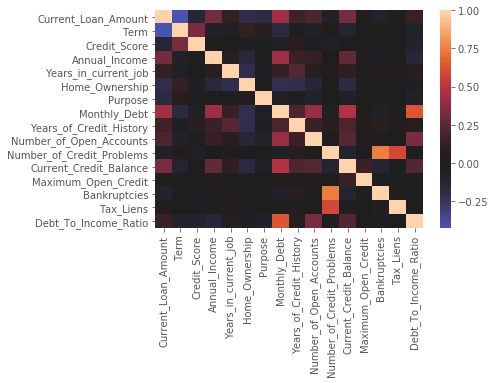

In [72]:
sns.heatmap(dfLoan.iloc[:, 1:].corr(), center=0);

In [73]:
#Load cleaned dataset to csv file

dfLoan.to_csv('creditTrain_cleaned.csv',index=False)


In [74]:
X = dfLoan.drop("Loan_Status",axis=1)
y = dfLoan['Loan_Status']
print('X:', X.shape)
print('y:', y.shape)

X: (88516, 16)
y: (88516,)


In [75]:
X.columns

Index(['Current_Loan_Amount', 'Term', 'Credit_Score', 'Annual_Income',
       'Years_in_current_job', 'Home_Ownership', 'Purpose', 'Monthly_Debt',
       'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens',
       'Debt_To_Income_Ratio'],
      dtype='object')

## Exploring/cleaning credit_test dataset

This dataset does not contain the target column which is the Loan_Status hence we will use this dataset in doing predictions.

In [76]:
df_test.shape

(10353, 18)

In [77]:
df_test.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

Replace spaces in all column names with space with underscore.

In [78]:
df_test.columns = [c.replace(' ', '_') for c in df_test.columns]

In [79]:
df_test.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [80]:
df_test.isnull().sum()

Loan_ID                          353
Customer_ID                      353
Current_Loan_Amount              353
Term                             353
Credit_Score                    2334
Annual_Income                   2334
Years_in_current_job             780
Home_Ownership                   353
Purpose                          353
Monthly_Debt                     353
Years_of_Credit_History          353
Months_since_last_delinquent    5659
Number_of_Open_Accounts          353
Number_of_Credit_Problems        353
Current_Credit_Balance           353
Maximum_Open_Credit              353
Bankruptcies                     375
Tax_Liens                        354
dtype: int64

In [81]:
null_Loan_ID_tst = df_test[df_test['Loan_ID'].isna()]

In [82]:
null_Loan_ID_tst.head(5)

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
null_Loan_ID_tst.tail(5)

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
10348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
dfLoanTst = df_test[df_test['Loan_ID'].notnull()]

As shown above, where Loan_ID is null, the values of the rest of the columns are all nulls as well. We will just drop these rows as these will not be relevant in testing the model.

In [85]:
dfLoanTst.isnull().sum()

Loan_ID                            0
Customer_ID                        0
Current_Loan_Amount                0
Term                               0
Credit_Score                    1981
Annual_Income                   1981
Years_in_current_job             427
Home_Ownership                     0
Purpose                            0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent    5306
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                0
Bankruptcies                      22
Tax_Liens                          1
dtype: int64

In [86]:
dfLoanTst = dfLoanTst.drop(['Months_since_last_delinquent','Loan_ID', 'Customer_ID'], axis=1)

In [87]:
dfLoanTst.columns

Index(['Current_Loan_Amount', 'Term', 'Credit_Score', 'Annual_Income',
       'Years_in_current_job', 'Home_Ownership', 'Purpose', 'Monthly_Debt',
       'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [88]:
dfLoanTst['Years_in_current_job'] = dfLoanTst['Years_in_current_job'].map({'< 1 year':0.5,'2 years':2,'3 years':3,'4 years':4,'5 years':5,
'6 years':6, '7 years':7,'8 years':8,'9 years':9, '10+ years':15})

### Cleaning credit score


Note that credit score attribute based from the data has values above 850 and seems that zero were added at the end, so we
 will need to remove the zeo for credit score above 850 by dividing credit score by 10
 dfLoan["Credit Score",">850"]
 

In [89]:
dfLoanTst['Credit_Score'] = dfLoanTst['Credit_Score'].apply(lambda val: (val /10) if val>850 else val)

In [90]:
dfLoanTst['Credit_Score'].unique()
#Now Credit Score above 850 is now normalized.

array([747., 734., 709., 727., 744., 741., 733.,  nan, 736., 683., 723.,
       680., 696., 729., 742., 715., 722., 740., 708., 705., 738., 717.,
       706., 647., 712., 704., 646., 682., 713., 716., 649., 688., 702.,
       674., 746., 719., 707., 726., 731., 751., 685., 721., 711., 652.,
       748., 667., 743., 690., 701., 730., 697., 699., 648., 673., 749.,
       657., 664., 725., 675., 720., 728., 724., 695., 643., 745., 714.,
       737., 606., 634., 735., 710., 732., 663., 676., 698., 750., 668.,
       703., 694., 656., 650., 718., 665., 693., 662., 689., 617., 670.,
       671., 608., 679., 621., 692., 640., 660., 651., 739., 700., 684.,
       686., 639., 631., 666., 678., 628., 633., 645., 681., 691., 620.,
       659., 604., 669., 661., 641., 642., 658., 655., 612., 627., 672.,
       654., 598., 623., 687., 636., 629., 653., 595., 602., 644., 677.,
       618., 616., 611., 630., 626., 588., 601., 613., 632., 637., 635.,
       622., 615., 624., 609., 625., 586., 614., 63

In [91]:
#Fill the null Credit Score with the mean credit score
dfLoanTst["Credit_Score"] = dfLoanTst["Credit_Score"].fillna(dfLoanTst["Credit_Score"].mean())

In [92]:
#check if there are rows where Loan_ID is null
dfLoanTst.Credit_Score.isnull().sum()

0

In [93]:
dfLoanTst['Credit_Score'] = dfLoanTst['Credit_Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
dfLoanTst['Credit_Score'] = dfLoanTst['Credit_Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
dfLoanTst['Credit_Score'] = dfLoanTst['Credit_Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
dfLoanTst['Credit_Score'] = dfLoanTst['Credit_Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
dfLoanTst['Credit_Score'] = dfLoanTst['Credit_Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

In [94]:
dfLoanTst["Years_in_current_job"] = dfLoanTst["Years_in_current_job"].fillna(dfLoanTst["Years_in_current_job"].mean())

In [95]:
dfLoanTst["Annual_Income"] = dfLoanTst["Annual_Income"].fillna(dfLoanTst["Annual_Income"].mean())

In [96]:
dfLoanTst["Bankruptcies"] = dfLoanTst["Bankruptcies"].fillna(0)

In [97]:
dfLoanTst["Tax_Liens"] = dfLoanTst["Tax_Liens"].fillna(0)

In [98]:
dfLoanTst["Maximum_Open_Credit"] = dfLoanTst["Maximum_Open_Credit"].fillna(0)

In [99]:
dfLoanTst[dfLoanTst['Current_Loan_Amount']== 99999999].Current_Loan_Amount.count()

1133

In [100]:
dfLoanTst = dfLoanTst[dfLoanTst['Current_Loan_Amount']!= 99999999]

In [101]:
dfLoanTst.shape

(8867, 15)

In [102]:
# Add one feature the Debt to Income Ratio.
# We get the monthly income to monthly debt ratio to have uniform unit.

dfLoanTst["Debt_To_Income_Ratio"] = dfLoanTst["Monthly_Debt"] / dfLoanTst["Annual_Income"]*12
dfLoanTst["Debt_To_Income_Ratio"].describe()




count    8867.000000
mean        0.171251
std         0.090101
min         0.000000
25%         0.107000
50%         0.164001
75%         0.227110
max         2.007657
Name: Debt_To_Income_Ratio, dtype: float64

In [103]:
dfLoanTst.isnull().sum()

Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
Debt_To_Income_Ratio         0
dtype: int64

In [104]:
dfLoanTst_num = dfLoanTst.select_dtypes(include=['float64'])
dfLoanTst_num.head(5)

,Current_Loan_Amount,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio
0,611314.0,2074116.0,15.0,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,0.243000
1,266662.0,1919190.0,15.0,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,0.228999
2,153494.0,871112.0,2.0,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,0.115600
3,176242.0,780083.0,15.0,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0.258001
4,321992.0,1761148.0,15.0,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0.268998


In [105]:
dfLoanTst_cat = dfLoanTst.select_dtypes(include=[object])
dfLoanTst_cat.head(5)

,Term,Credit_Score,Home_Ownership,Purpose
0,Short Term,Very Good,Home Mortgage,Debt Consolidation
1,Short Term,Good,Home Mortgage,Debt Consolidation
2,Short Term,Good,Rent,Debt Consolidation
3,Short Term,Good,Rent,Debt Consolidation
4,Short Term,Very Good,Home Mortgage,Debt Consolidation


In [106]:
from sklearn.preprocessing import LabelEncoder
le_Term = LabelEncoder()
le_Credit_Score = LabelEncoder()
le_HomeOwnership = LabelEncoder()
le_Purpose = LabelEncoder()
dfLoanTst['Term'] = le_Term.fit_transform(dfLoanTst.Term)
dfLoanTst['Credit_Score'] = le_Credit_Score.fit_transform(dfLoanTst.Credit_Score)
dfLoanTst['Home_Ownership'] = le_HomeOwnership.fit_transform(dfLoanTst.Home_Ownership)
dfLoanTst['Purpose'] = le_Purpose.fit_transform(dfLoanTst.Purpose)

In [107]:
dfLoanTst.head(5)

,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Debt_To_Income_Ratio
0,611314.0,1,2,2074116.0,15.0,1,3,42000.83,21.8,9.0,0.0,621908.0,1058970.0,0.0,0.0,0.243000
1,266662.0,1,1,1919190.0,15.0,1,3,36624.40,19.4,11.0,0.0,679573.0,904442.0,0.0,0.0,0.228999
2,153494.0,1,1,871112.0,2.0,3,3,8391.73,12.5,10.0,0.0,38532.0,388036.0,0.0,0.0,0.115600
3,176242.0,1,1,780083.0,15.0,3,3,16771.87,16.5,16.0,1.0,156940.0,531322.0,1.0,0.0,0.258001
4,321992.0,1,2,1761148.0,15.0,1,3,39478.77,26.0,14.0,0.0,359765.0,468072.0,0.0,0.0,0.268998


In [108]:
#Load to csv file
dfLoanTst.to_csv('creditTest_cleaned.csv',index=False)
